## Análisis de Componentes Principales

Cuando tenemos muchas columnas de una matriz de datos, el entrenamiento puede tornarse infructuoso dado que se hacen muchos cálculos, más gasto de tiempo y más demora para llegar a una convergencia.

Supongamos que tenemos una matriz de datos de dimensión $(m,n)$, donde $m$ es la cantidad de filas o ejemplos para entrenar los datos y $n$ es la cantidad de columnas ó características que tiene la matriz. Cuando $n$ es tan grande que aumenta el procesamiento y no da para lograr entrenar rápido y efectivamente a un modelo, el PCA o análisis de componentes principales puede ser útil.

PCA consiste en:
1. Previamente estandarizar los datos:
  \begin{equation}X_{escalado} = X - \bar{X}
  \end{equation}
2. Crear la matriz de covarianza entre los datos. Es lógico que la matriz de covarianza será de dimensión $n,n$. Recordemos que la covarianza mide la correlación que hay entre entre una variable y otra. La máxima correlación botará el valor de 1.
  
  \begin{equation}
  \sigma^{2}_{xy} = \frac{\sigma_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}
  \end{equation}
3. Buscar los autovalores y autovectores que satisfagan a la matriz de covarianza:
  \begin{equation}
  Cov*\vec{V} = \lambda * \vec{V}
  \end{equation}
$
  \begin{equation}
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{1n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix} * 
\begin{bmatrix}
v_{1}\\
v_{2}\\
.\\
.\\
.\\
v_{n}
\end{bmatrix} = 
\lambda * 
\begin{bmatrix}
v_{1}\\
v_{2}\\
.\\
.\\
.\\
v_{n}
\end{bmatrix}
\end{equation}$
4. Organizar los autovalores de mayor a menor, de manera que obtengamos los vectores propios que otorgan la mayor varianza. A mayor valor del autovalor, significa que su autovector respectivo nos dará mayor varianza de los datos.
5. Dada esa selección previa de la cantidad de componentes que queremos obtener, se construye la matriz de proyección, esto se hará con la cantidad de componentes que querramos escoger.
6. Luego de ya obtenida la matriz de autovectores, se hace la transformación del conjunto de datos, esto se hace por un producto de matrices de la matriz de datos de dimensión $(m,n)$ ya estandarizada, por la matriz de autovectores de dimensión $(n,z)$, donde $z < n$, lógicamente la matriz resultante es de dimensión $(m,z)$ y tendrá por significado la matriz de datos en modo PCA.

\begin{equation}
X_{transformado}^{(m,z)} = X^{(m,n)}_{centrado} * M_{autovectores}^{(n,z)}
\end{equation}

Se puede saber que los autovalores y autovectores son los correctos si cumplen esta propiedad: $\begin{equation}
C = \begin{bmatrix}
V_{11} & V_{12} & ... & V_{1z}\\
V_{21} & V_{22} & ... & V_{2z}\\
. & . & ... & .\\
. & . & ... & .\\
. & . & ... & .\\
V_{m1} & V_{m2} & ... & V_{mz}\\
\end{bmatrix} * \begin{bmatrix}
\lambda_{1} & 0 & 0 & 0 & ...\\
0 & \lambda_{2} & 0 & 0 & ...\\
0 & 0 & \lambda_{3} & 0 & ...\\
0 & 0 & 0 & ... & ...\\
0 & 0 & 0 & 0 &\lambda{n} \\
\end{bmatrix} * 
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{2n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix}^{-1} = 
\begin{bmatrix}
C_{11} & C_{12} & . & . & . & C_{1n}\\
C_{21} & C_{22} & . & . & . & C_{1n}\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
. & . & . & . & . & .\\
C_{m1} & C_{m2} & . & . & . & C_{mn}\\
\end{bmatrix}
\end{equation}$

Pongamos un ejemplo sencillo para que sea de sencilla comprensión.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig, det, norm, inv
import pandas as pd

Creemos una matriz 2x2 que sean nuestros datos

In [2]:
np.random.seed(42)
x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)

In [3]:
xy = np.hstack([x, y])

$xy$ es muy grande, de dimensión (200,2). Miremos cómo luce en gráfica

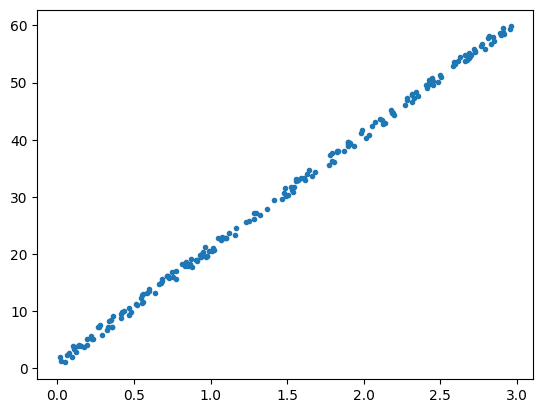

In [4]:
plt.plot(xy[:, 0], xy[:, 1], '.')
plt.show()

Centremos los datos y grafiquemos para saber qué cambió

In [5]:
xy_centrado = xy - np.mean(xy, axis=0)

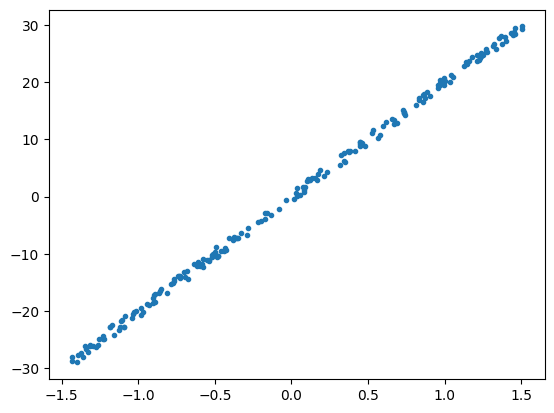

In [6]:
plt.plot(xy_centrado[:, 0], xy_centrado[:, 1], '.')
plt.show()

Vemos claramente que quedaron centrados en el 0. Ahora busquemos los autovalores y autovectores.

In [7]:
avals, avecs = eig(xy_centrado.T.dot(xy_centrado))
avecs

array([[-0.99875285, -0.04992746],
       [ 0.04992746, -0.99875285]])

Ahora lo que necesitamos reflejar es este par de autovectores en la gráfica de los puntos. Creemos las funciones que necesitaremos:

In [8]:
def graficarVectores(vecs, cols, alpha = 1):
    plt.axvline(x = 0, color="grey", zorder = 0)
    plt.axhline(y = 0, color="grey", zorder = 0)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0], vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles = 'xy', scale_units = 'xy',
                   scale = 1, alpha = alpha,
                   color = cols[i]
                  )

In [9]:
def graficarMatriz(matriz, vectorCol=['red', 'blue']):
    #círculo unitario
    x = np.linspace(-1,1, 100000)
    y = np.sqrt(1-(x**2))
    
    #círculo unitario transformado
    x1 = matriz[0,0]*x + matriz[0,1]*y
    y1 = matriz[1,0]*x + matriz[1,1]*y
    x1_neg = matriz[0,0]*x - matriz[0,1]*y
    y1_neg = matriz[1,0]*x - matriz[1,1]*y
    
    #vectores
    u1 = [matriz[0,0], matriz[1,0]]
    v1 = [matriz[1,0], matriz[1,1]]
    
    graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
    plt.plot(x1, y1, 'green', alpha = 0.7)
    plt.plot(x1_neg, y1_neg, 'green', alpha = 0.7)

Ahora sí, graficamos los autovectores:

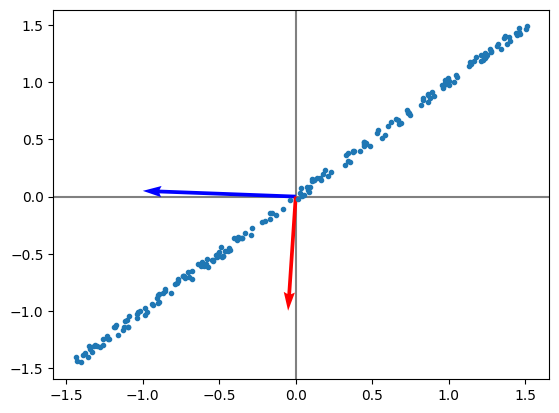

In [10]:
graficarVectores(avecs.T, ['blue', 'red'])
plt.plot(xy_centrado[:,0], xy_centrado[:,1]/20, '.')
plt.show()

Chequeemos los autovalores

In [11]:
avals

array([1.70408413e-01, 6.24117888e+04])

El autovector rojo representa mayor varianza de los datos que el azul. Nos quedaremos con los 2 componentes.

Ordenemos:

In [12]:
componentes_ordenados = np.argsort(avals)[::-1]
matriz_proyeccion = avecs[componentes_ordenados]

Ahora hagamos la transformación:

In [13]:
xy_nuevo = xy_centrado.dot(matriz_proyeccion.T)

In [14]:
xy_nuevo.shape

(200, 2)

Probemos PCA con la librería Scikit-learn.

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
pca.fit(xy_centrado)
x_pca = pca.transform(xy_centrado)
print(xy_centrado.shape)
print(x_pca.shape)

(200, 2)
(200, 2)


Veamos otro ejemplo y visualicemos un poco mejor

In [17]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                        11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                        13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                        12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

            "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                                42.32, 41.57, 41.26, 42.01, 41.46,
                                41.71, 41.36, 40.82, 41.22, 41.11,
                                41.07, 41.20, 40.61, 41.52, 41.26]}

datos = pd.DataFrame(datos)

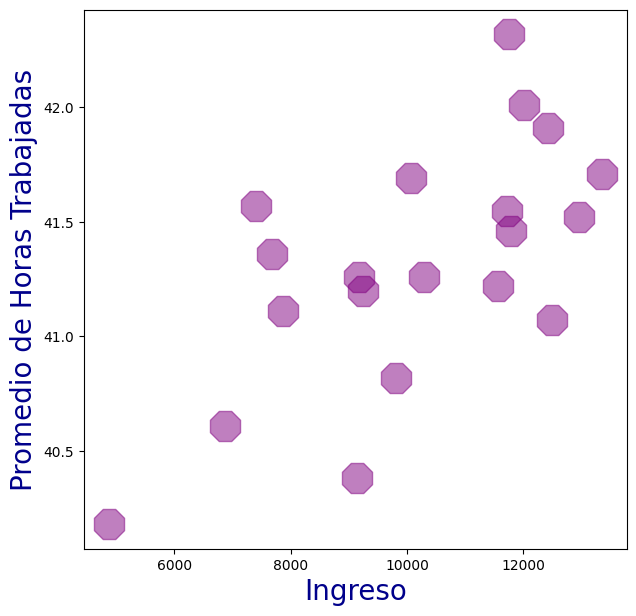

In [18]:
# Código de visualización
fig = plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=20, color="darkblue")
plt.ylabel("Promedio de Horas Trabajadas", fontsize=20, color="darkblue")
plt.show()

## Paso 1. Estandarización de Datos

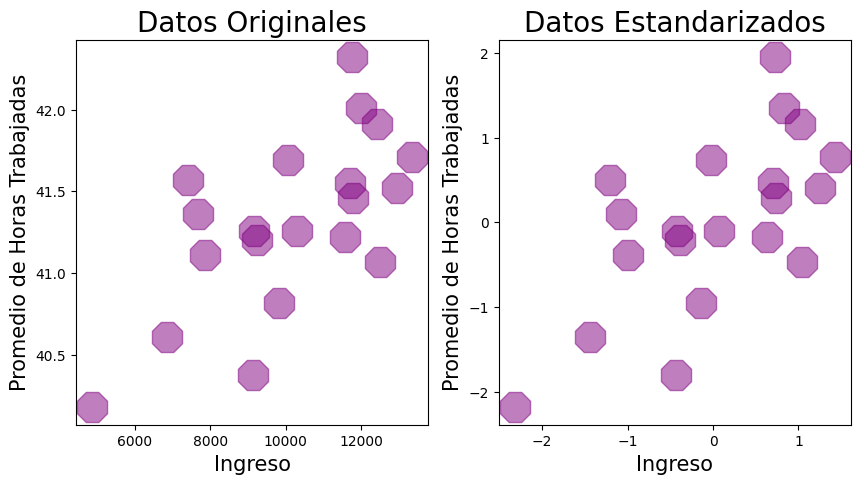

In [19]:
from sklearn.preprocessing import StandardScaler

# Código de visualización

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Datos Originales", fontsize=20)
ax1.scatter(datos["ingreso"], datos["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)
ax1.set_xlabel("Ingreso", fontsize=15)
ax1.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)


# Estandarización de los datos
datos = pd.DataFrame(StandardScaler().fit_transform(datos),
                    columns=["ingreso", "horas_trabajadas"])


# Código de visualización
ax2.set_title("Datos Estandarizados", fontsize=20)
ax2.scatter(datos["ingreso"], datos["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)
ax2.set_xlabel("Ingreso", fontsize=15)
ax2.set_ylabel("Promedio de Horas Trabajadas", fontsize=15)

plt.show()

## Paso 2. Matriz de Covarianza

                   ingreso  horas_trabajadas
ingreso           1.052632          0.682360
horas_trabajadas  0.682360          1.052632


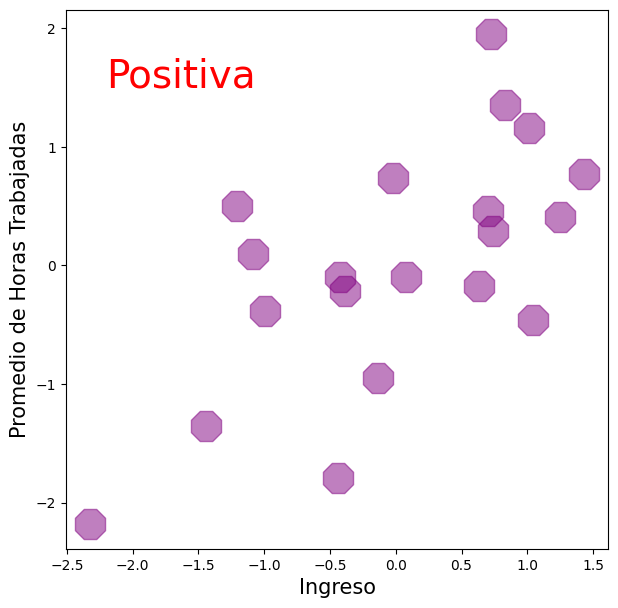

In [20]:
print(datos.cov())

# Código de visualización

plt.figure(figsize=(7, 7))
plt.scatter(datos["ingreso"], datos["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.text(-2.2, 1.5, "Positiva", fontsize=28, color="red")
plt.show()

## Paso 3: Eigenvalores & Eigenvectores

Eigenvector Rojo: [-0.70710678  0.70710678] Eigenvalor: 0.3702717235001508
Eigenvector Azul: [0.70710678 0.70710678] Eigenvalor: 1.734991434394586


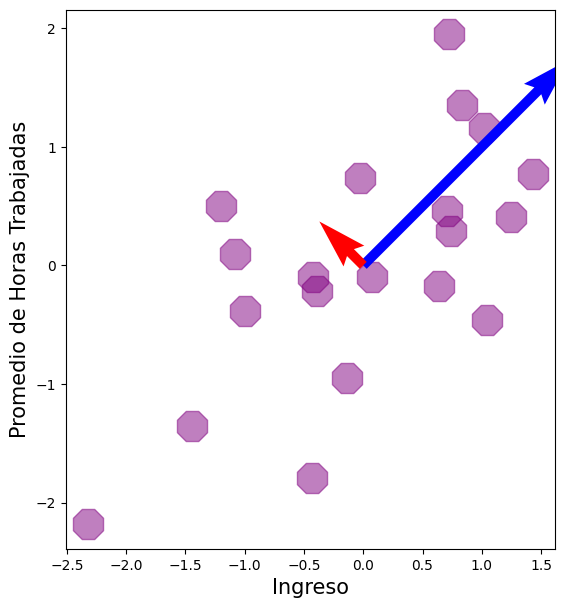

In [21]:
# Calcular eigenvalores y eigenvectores
valores, vectores = eig(datos.cov())

vector_azul = vectores[:, 0]
vector_rojo = vectores[:, 1]

print("Eigenvector Rojo:", vector_rojo, "Eigenvalor:", valores[1])
print("Eigenvector Azul:", vector_azul, "Eigenvalor:", valores[0])

# Código de visualización

plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(datos["ingreso"], datos["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)

# Graficando los eigenvectores
plt.quiver(0, 0, 
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.quiver(0, 0, 
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.show()

El autovector azul está proveyendo más varianza en el conjunto de datos que el autovector rojo.

## Paso 4: Proyecta datos

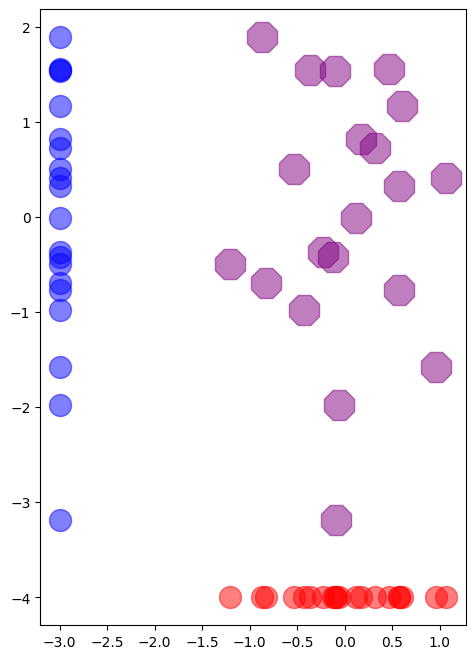

In [22]:
proyectados = pd.DataFrame(datos.values @ vectores.T, 
                            columns=["ingreso", "horas_trabajadas"])

# Código de visualización
plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(proyectados["ingreso"], proyectados["horas_trabajadas"], 
            marker="8", s=550, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión
plt.scatter(proyectados["ingreso"], [-4]*len(proyectados["ingreso"]), 
            s=250, color="red", alpha=0.5)

plt.scatter([-3]*len(proyectados["horas_trabajadas"]), proyectados["horas_trabajadas"], 
            s=250, color="blue", alpha=0.5)
plt.show()

## Paso 5: Selecciona los componentes

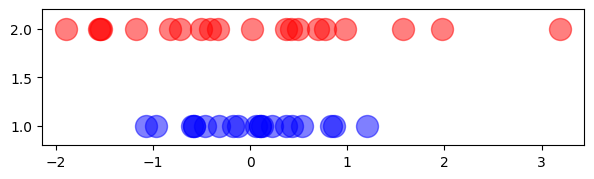

Varianza explicada por cada componente: [1.73499143 0.37027172]
Proporción de varianza explicada por cada componente: [0.82412093 0.17587907]


In [23]:
# Obtención de componentes principales
pca = PCA()
datos = pca.fit_transform(datos)

# Código de visualización
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

Lo que hace PCA es mediante la magia del álgebra lineal posicionarnos en nuevos ejes para visualizar nuestros datos de manera que se pueda reducir la dimensionalidad sin sacrificar demasiado porcentaje de varianza.

Ya comprendido, hagamos esto con un dataset más amplio, además de real. Tomemos el dataset de NIR de plásticos:

In [24]:
df_nir_train = pd.read_excel('MATRIZ FINAL.xlsx', sheet_name='calibracion')
df_nir_val = pd.read_excel('MATRIZ FINAL.xlsx', sheet_name='validacion')

In [25]:
df_nir_train.shape

(266, 1110)

In [26]:
df_X_train = df_nir_train.iloc[:,1:1104]

In [27]:
df_X_train_escalado = df_X_train - np.mean(df_X_train, axis=0)

In [28]:
pca = PCA(n_components=200)
pca.fit(df_X_train_escalado)
X_nir_pca = pca.transform(df_X_train_escalado)

In [29]:
X_nir_pca.shape

(266, 200)

También en el argumento n_components se puede colocar un flotante, que significa es el porcentaje de varianza que quiero conservar de los datos, entonces luego podríamos consultar la cantidad de componentes que satisfacen ese porcentaje.

In [30]:
pca = PCA(n_components=0.99)
pca.fit(df_X_train_escalado)
X_nir_pca = pca.transform(df_X_train_escalado)

In [31]:
print(pca.n_components_)

4


Nos arroja que para mantener el 99% de la varianza se necesita de los primeros 4 componentes principales.

In [27]:
X_nir_pca.shape

(266, 4)

Veamos qué porcentaje de la varianza posee cada autovector. Esto se obtiene con el valor de un autovector dividido por la suma de los autovalores y multiplicado por 100. Tenemos dentro del objeto pca un método que nos entrega este proceso ya hecho, pero sin estar multiplicado por 100, debemos hacerlo nosotros:

In [34]:
pca.explained_variance_ratio_*100

array([76.71609604, 20.79538914,  1.24439013,  0.52228533])

Vemos que podemos deshacernos del cuarto componente principal, ya que queremos descartar aquellos que aporten menos del 1% de la varianza.